# Monotoniforhold

In [1]:
import numpy as np
import plotly.express as px
from sympy import *
import pandas as pd
import plotly.graph_objects as go

In [2]:
x = Symbol('x')
f = Function('f', real=True)
df = Function('df', real=True)

### Funktion

In [32]:
f = 3*x**3 - 5*x
f

3*x**3 - 5*x

### Den afledede til funktionen

In [33]:
df = f.diff(x)
df

9*x**2 - 5

Nulpunkter for den afledede funktion

In [34]:
zeros = solveset(df, x, Interval(-2, 4))
zeros

FiniteSet(-sqrt(5)/3, sqrt(5)/3)

In [35]:
N(zeros)

FiniteSet(-0.74535599249993, 0.74535599249993)

In [36]:
zeros = list(zeros)
lam_f = lambdify(x, f)
lam_df = lambdify(x, df)

In [37]:
x = np.linspace(-2, 3, 200)

In [38]:
dataframe = pd.DataFrame(data={'x': x, 'f': lam_f(x), 'f\'': lam_df(x)})

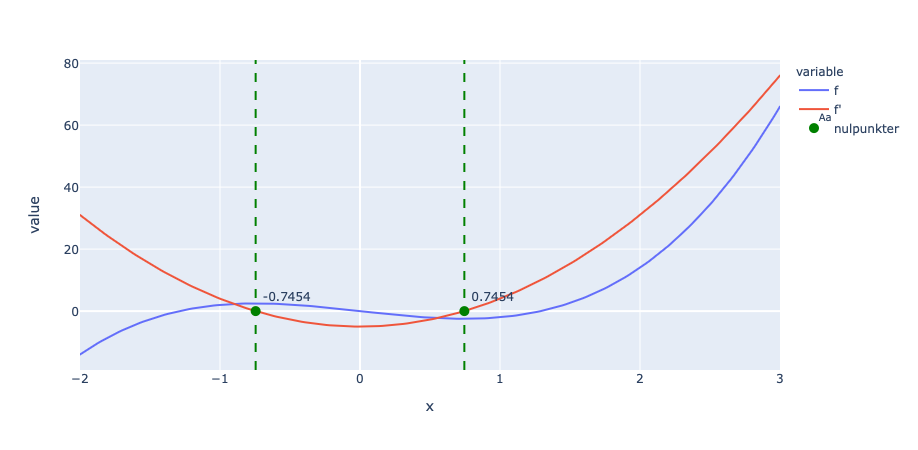

In [175]:
fig = px.line(dataframe, x='x', y=['f', 'f\''])
fig.add_vline(x=float(zeros[0]), line_width=2, line_dash="dash", line_color="green")
fig.add_vline(x=float(zeros[1]), line_width=2, line_dash="dash", line_color="green")
fig.add_trace(go.Scatter(
    x=[float(zeros[0]), float(zeros[1])],
    y=[0, 0],
    mode="markers+text",
    name="nulpunkter",
    text=["%.4f" % float(zeros[0]), "%.4f" % float(zeros[1])],
    textposition="top right",
    marker=dict(color='green', size=10)
))
fig.show()

In [130]:
z0m1 = float(zeros[0]) - 1
z0 = float(zeros[0])
z0midz1 = float(zeros[0]) + (float(zeros[1])-float(zeros[0]))/2.
z1 = float(zeros[1])
z1p1 = float(zeros[1]) + 1

In [170]:
def m(x):
    if x<0: return '➘'
    if x>0: return '➚'
    return ''

In [171]:
df = pd.DataFrame([
    ['x', z0m1, z0, z0midz1, z1, z1p1], 
    ['f\'(x)', lam_df(z0m1), lam_df(z0), lam_df(z0midz1), lam_df(z1),lam_df(z1p1)],
    ['f(x)', m(lam_df(z0m1)), m(lam_df(z0)), m(lam_df(z0midz1)), m(lam_df(z1)),m(lam_df(z1p1))]
])

In [172]:
df.columns = ['','','','','','']

In [173]:
print(df.to_string(index=False))

                                                    
    x  -1.745356 -0.745356  0.0  0.745356   1.745356
f'(x)  22.416408       0.0 -5.0       0.0  22.416408
 f(x)          ➚              ➘                    ➚
